# EDA-This dataset contains 10,000 customer records from a retail bank. Each entryincludes demographic details, financial indicators, and a churn label (Exited).The objective is to identify key patterns and insights related to customer, attrition using Power BI for visual analytics and Python for deep-dive statistical analysis.

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#loading the csv file
df=pd.read_csv("Customer-Churn-Records.csv")

In [3]:
#checking the first 5 records to get the undersanding of the table
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
#this shows the number of rows and columns in the dataset
df.shape

(10000, 18)

In [5]:
#This will give the information about the null data and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
#this will specifically give the datatypes, which will help us identify if we have to convert any particular data type
#to a different datatype for our analysis 
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [7]:
#this will tell if we have any null values in the dataset, shows our dataset has no null values
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
#this will show the column names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [9]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [10]:
# Since we have a column Row number which is unnecessary, lets remove it
df.drop("RowNumber",axis=1, inplace = True)

In [11]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [12]:
len(df)

10000

In [13]:
#Q1 Check the percentage of missing data and handle accordingly.
missing_percent = (df.isnull().sum() / len(df)) * 100

In [14]:
#This shows our dataset has no null/missing values
missing_percent

CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

In [15]:
#Q2:How many rows and columns are there in the dataset?
print(df.shape)
print(f'the dataset has {df.shape[0]} rows and {df.shape[1]} columns')

(10000, 17)
the dataset has 10000 rows and 17 columns


In [16]:
#Q3: What is the distribution of churned vs. non-churned customers?
distribution= df['Exited'].value_counts()

In [17]:
#this shows that the people who churned is less than people who didn't.
distribution

0    7962
1    2038
Name: Exited, dtype: int64

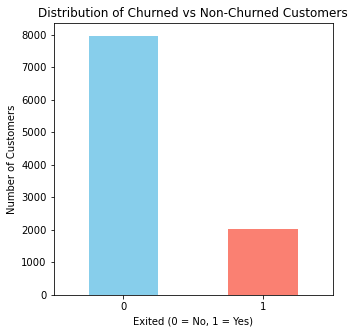

In [18]:
#Showcasing using bar chart the distribution of churned and non churned customers
plt.figure(figsize=(5,5))
df['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Churned vs Non-Churned Customers')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [19]:
#Q4 What is the distribution of EstimatedSalary of churned and retained customers?

df.groupby("Exited")["EstimatedSalary"].mean()

Exited
0     99726.853141
1    101509.908783
Name: EstimatedSalary, dtype: float64

In [20]:
#The below figure shows that the people who have exited/ churned have more salaries compared to retained customers

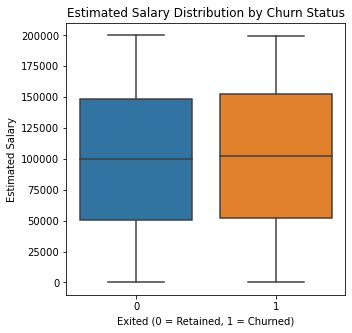

In [21]:
#using boxplot we can see the distribution
plt.figure(figsize=(5,5))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary Distribution by Churn Status')
plt.xlabel('Exited (0 = Retained, 1 = Churned)')
plt.ylabel('Estimated Salary')
plt.show()

In [22]:
#Q5.How do churn rates vary by Gender, Geography, and IsActiveMember?
# grouped each factor by Gender , geography and iscativemember, calculated the average and ,mu;tiplied by 100
#to get the churn rate
print("Churn Rate by Gender")
df.groupby("Gender")['Exited'].mean()*100

Churn Rate by Gender


Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64

In [23]:
print("Churn Rate by Geography")
df.groupby("Geography")['Exited'].mean()*100

Churn Rate by Geography


Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

In [25]:
print("Churn Rate by IsActiveMember")
df.groupby("IsActiveMember")["Exited"].mean()*100

Churn Rate by IsActiveMember


IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64

In [31]:
#Q6.What is the average CreditScore, Balance, and EstimatedSalary of churned vs. retained customers?
avg_churn= df.groupby("Exited")[["CreditScore","EstimatedSalary","Balance"]].mean()
print(avg_churn)

        CreditScore  EstimatedSalary       Balance
Exited                                            
0        651.837855     99726.853141  72742.750663
1        645.414622    101509.908783  91109.476006


In [33]:
#In the above code we grouped by Exited status and took the mean(average) of all categories
#This shows the credit score of the people who left(exited) is less wheras estimated salary and balance was on a higher side

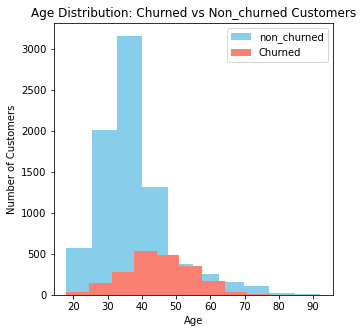

In [44]:
#Q7.How does Age impact churn? Plot histograms and boxplots for churned and non-churned groups.
#Lets Separate churned and nonchurned customers
#Here we assigned the value(1) that is churned customer as a variable "Churned"
#and Retained customers(0) as non_churned 
churned = df[df['Exited'] == 1]
non_churned=df[df['Exited']==0]

#Histogram:
plt.figure(figsize=(5,5))
plt.hist(non_churned['Age'], bins=10, label='non_churned', color='skyblue')
plt.hist(churned['Age'], bins=10, label='Churned', color='salmon')
plt.title('Age Distribution: Churned vs Non_churned Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


In [45]:
#the above diagram shows that Retained customers (blue) concentrated in 25–45 age range
#the Churned customers (Salmon) more frequent in 38–60 range

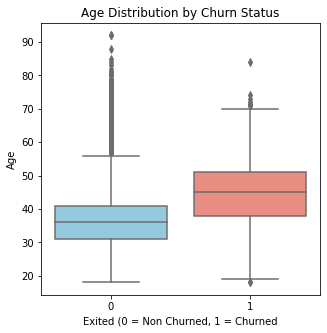

In [47]:
#Boxplot: 
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Exited', y='Age', palette=['skyblue', 'salmon'])

plt.title('Age Distribution by Churn Status')
plt.xlabel('Exited (0 = Non Churned, 1 = Churned')
plt.ylabel('Age')
plt.show()

In [ ]:
#The above boxplot shows Older customers are more likely to churn
#0 (Non Churned) → mostly lower ages (median around 35–40)
#1 (Churned) → higher ages (median around 45–50)

In [50]:
#Q8.Is there any correlation among numeric features like CreditScore, Balance, and EstimatedSalary?
#lets select the columns and store it in a variable
num_cols = ['CreditScore', 'Balance', 'EstimatedSalary']
corr = df[num_cols].corr()
print(corr)

                 CreditScore   Balance  EstimatedSalary
CreditScore         1.000000  0.006268        -0.001384
Balance             0.006268  1.000000         0.012797
EstimatedSalary    -0.001384  0.012797         1.000000


In [ ]:
#CreditScore, Balance, and EstimatedSalary show very weak or no correlation (values near 0).

In [53]:
#Q9.What does a heatmap reveal about feature interactions with churn?
#Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
corr

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.006203,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628


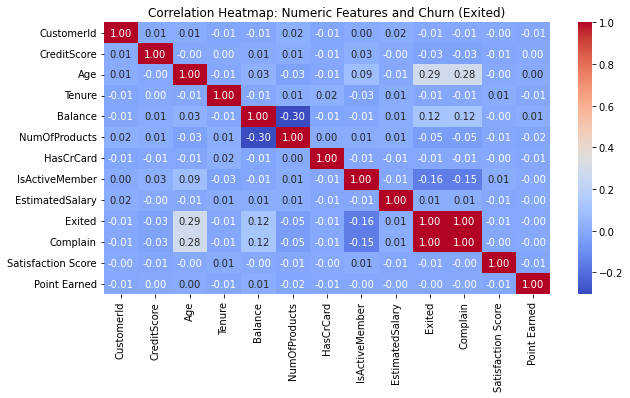

In [60]:
#Q9.What does a heatmap reveal about feature interactions with churn?
#Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap: Numeric Features and Churn (Exited)')
plt.show()

In [ ]:
#The above diagram shows the darkest color(red and blue) features are highly correlated positive and negative both

In [66]:
#Q11 Group customers into age brackets (e.g.,18-30 as Adults, 30-50 as middle
#age and 50-100 as seniors.). How does churn rate change across them?
#lets create a function to devide the age into groups and add a new column in our dataset
#FEATURE ENGINEERING

def grouped_age(age):
    if age <= 30:
        return 'Adults (18-30)'
    elif age <= 50:
        return 'Middle Age (30-50)'
    else:
        return 'Seniors (50+)'

In [64]:
df['AgeGroup'] = df['Age'].apply(grouped_age)
print(df[['Age', 'AgeGroup']].head(10))

   Age            AgeGroup
0   42  Middle Age (30-50)
1   41  Middle Age (30-50)
2   42  Middle Age (30-50)
3   39  Middle Age (30-50)
4   43  Middle Age (30-50)
5   44  Middle Age (30-50)
6   50  Middle Age (30-50)
7   29      Adults (18-30)
8   44  Middle Age (30-50)
9   27      Adults (18-30)


In [65]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Middle Age (30-50)
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Middle Age (30-50)
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Middle Age (30-50)
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Middle Age (30-50)
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Middle Age (30-50)


In [68]:
churn_rate = df.groupby('AgeGroup')['Exited'].mean() * 100
print(churn_rate)

AgeGroup
Adults (18-30)         7.520325
Middle Age (30-50)    19.598287
Seniors (50+)         44.647105
Name: Exited, dtype: float64


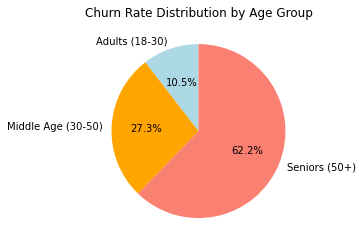

In [74]:
#The above code shows that maximum churn rate is of the senior people
#lets see this distribution through the pie chart
plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%', startangle=90, 
        colors=['lightblue', 'orange', 'salmon'])
plt.title('Churn Rate Distribution by Age Group')
plt.show()

In [76]:
#Q12 Are customers with only one product (NumOfProducts = 1) more likely to churn than those with multiple?
churn_by_products=df.groupby("NumOfProducts")["Exited"].mean()*100
print(churn_by_products)

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


In [77]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
#The above values suggest since the number of customer who have products 3 and 4 are few in number hence the churn rate 
#shows higher values, but if we see the customers with only 1 product are likely to churn more because the number of
#customers are quiet large in nyumbers